# Hex Map
There are a relatively small number of actions that are taken over the course of a game. Therefore, it is reasonable to derive a strategy, if not for the whole game play-by-play, then by organizing a handful of turns.

One overall strategy in the game is to minimize the number of times the sail action is used. This implies more turns are spent taking two *productive* actions that naturally synergize. For example, using the merchant guild means goods can be sold to acquire money to buy more goods on the same turn. Furthermore, this means sail actions will maximize moving both ships on the same turn, making the most of the movement available bewteen both ships.

A Hex Map will be a useful tool for creating a SeaFall playbook.

In [1]:
%matplotlib inline
import numpy
import matplotlib
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.path as mpath
import numpy as np
import seaborn as sns
import networkx as nx
import pandas as pd

In [2]:
# colormap for data visualizations
cmap = sns.color_palette("Set2", 8)

The hex grid will be stored in a dictionary using 3 coordinates to define the location. 3-dimensional coordintes will be translated into a 2D representation in order to create the grid. The transformation from 3D coordinates to 2D coordinates is done using matrix multiplication. In video games and computer vision this is done routinely to translate rendered 3D graphics into screen coordinates. The website redblobgames.com also provides the transformation matrix.

In [3]:
class SeafallPlayerTurn:
    def __init__(self):
        print("hello")

In [4]:
class SeafallIsland:
    def __init__(self):
        print("hello")

In [5]:
hexgrid = {}
hexgrid_keys = []
hexgrid_keys.append("coastal_waters")
hexgrid_keys.append("home_harbor_purple")
hexgrid_keys.append("home_harbor_red")
hexgrid_keys.append("home_harbor_gray")
hexgrid_keys.append("home_harbor_blue")
hexgrid_keys.append("home_harbor_green")
# row 0
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(0*numpy.ones(9, dtype=numpy.int), numpy.arange(0,9), numpy.arange(0,9))]
# row 1
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(1*numpy.ones(10, dtype=numpy.int), numpy.arange(-1,9), numpy.arange(0,10))]
# row 2
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(2*numpy.ones(9, dtype=numpy.int), numpy.arange(-1,8), numpy.arange(1,10))]
# row 3
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(3*numpy.ones(10, dtype=numpy.int), numpy.arange(-2,8), numpy.arange(1,11))]
# row 4
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(4*numpy.ones(9, dtype=numpy.int), numpy.arange(-2,7), numpy.arange(2,11))]
# row 5
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(5*numpy.ones(10, dtype=numpy.int), numpy.arange(-3,7), numpy.arange(2,12))]
# row 6
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(6*numpy.ones(9, dtype=numpy.int), numpy.arange(-3,6), numpy.arange(3,12))]
# row 7
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(7*numpy.ones(10, dtype=numpy.int), numpy.arange(-4,6), numpy.arange(3,13))]
# row 8
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(8*numpy.ones(9, dtype=numpy.int), numpy.arange(-4,5), numpy.arange(4,13))]
# row 9
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(9*numpy.ones(10, dtype=numpy.int), numpy.arange(-5,5), numpy.arange(4,14))]
# row 10
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(10*numpy.ones(9, dtype=numpy.int), numpy.arange(-5,4), numpy.arange(5,14))]
# row 11
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(11*numpy.ones(10, dtype=numpy.int), numpy.arange(-6,4), numpy.arange(5,15))]
# row 12
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(12*numpy.ones(9, dtype=numpy.int), numpy.arange(-6,3), numpy.arange(6,15))]
# row 13
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(13*numpy.ones(10, dtype=numpy.int), numpy.arange(-7,3), numpy.arange(6,16))]
# row 14
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(14*numpy.ones(9, dtype=numpy.int), numpy.arange(-7,2), numpy.arange(7,16))]

In [6]:
class SeaFallMap:
    def __init__(self):
        """
        This object contains a list of all the coordinates for the SeaFall game board stored in hexgrid_keys.
        """
        self.hexgrid = {}
        
        self.hexgrid_keys = []
        
        self.hexgrid_keys.append("coastal_waters")
        
        self.hexgrid_keys.append("home_harbor_purple")
        
        self.hexgrid_keys.append("home_harbor_red")
        
        self.hexgrid_keys.append("home_harbor_gray")
        
        self.hexgrid_keys.append("home_harbor_blue")
        
        self.hexgrid_keys.append("home_harbor_green")
        
        # row 0
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(0*numpy.ones(9, dtype=numpy.int), numpy.arange(0,9), numpy.arange(0,9))]
        
        # row 1
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(1*numpy.ones(10, dtype=numpy.int), numpy.arange(-1,9), numpy.arange(0,10))]
        
        # row 2
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(2*numpy.ones(9, dtype=numpy.int), numpy.arange(-1,8), numpy.arange(1,10))]
        
        # row 3
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(3*numpy.ones(10, dtype=numpy.int), numpy.arange(-2,8), numpy.arange(1,11))]
        
        # row 4
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(4*numpy.ones(9, dtype=numpy.int), numpy.arange(-2,7), numpy.arange(2,11))]
        
        # row 5
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(5*numpy.ones(10, dtype=numpy.int), numpy.arange(-3,7), numpy.arange(2,12))]
        
        # row 6
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(6*numpy.ones(9, dtype=numpy.int), numpy.arange(-3,6), numpy.arange(3,12))]
        
        # row 7
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(7*numpy.ones(10, dtype=numpy.int), numpy.arange(-4,6), numpy.arange(3,13))]
        
        # row 8
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(8*numpy.ones(9, dtype=numpy.int), numpy.arange(-4,5), numpy.arange(4,13))]
        
        # row 9
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(9*numpy.ones(10, dtype=numpy.int), numpy.arange(-5,5), numpy.arange(4,14))]
        
        # row 10
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(10*numpy.ones(9, dtype=numpy.int), numpy.arange(-5,4), numpy.arange(5,14))]
        
        # row 11
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(11*numpy.ones(10, dtype=numpy.int), numpy.arange(-6,4), numpy.arange(5,15))]
        
        # row 12
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(12*numpy.ones(9, dtype=numpy.int), numpy.arange(-6,3), numpy.arange(6,15))]
        
        # row 13
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(13*numpy.ones(10, dtype=numpy.int), numpy.arange(-7,3), numpy.arange(6,16))]
        
        # row 14
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(14*numpy.ones(9, dtype=numpy.int), numpy.arange(-7,2), numpy.arange(7,16))]
        
        self.hexgrid_patches = []
        
        self.layout_flat = [3.0 / 2, 0.0, numpy.sqrt(3.0) / 2,
                            numpy.sqrt(3.0), 2.0 / 3, 0.0,
                            -1.0 / 3, numpy.sqrt(3.0) / 3, 0.0]
        
        self.layout_pointy = [numpy.sqrt(3.0), numpy.sqrt(3.0)/2, 0.0, 
                              3.0/2, numpy.sqrt(3.0)/3, -1.0/3,
                              0.0, 2.0/3, 1.0/2]

        self.size = 1.0

        self.origin = [0,0,0]
        
        self.fig = []
        
        self.ax = []
    
    def hex_to_pixel(self, layout, grid, size, origin):
        
        x = (layout[0]*grid[0] + layout[1]*grid[1])*size + origin[0]
        
        y = (layout[2]*grid[0] + layout[3]*grid[1])*size + origin[1]
   
        return [x, y]


    def seafall_hex_patch(self, loc):

        hex2d = self.hex_to_pixel(self.layout_flat, loc, self.size, self.origin)

        hex_patch = mpatches.RegularPolygon(hex2d, 
                                            6, 
                                            self.size, 
                                            orientation=np.pi/2,
                                            linestyle="solid",
                                            linewidth=2,
                                            color=cmap[7],
                                            fill=False)

        return hex_patch

    
    def seafall_coastal_waters_patch(self):

        # row -1
        hexgrid_keys = [tuple(i) for i in zip(-1*numpy.ones(10, dtype=numpy.int), numpy.arange(0,10), numpy.arange(-1,9))]

        hexgrid_patches = []

        for i in hexgrid_keys:

            hexgrid_patches.append(self.seafall_hex_patch(i))

        hexgrid_verts = []

        for i in hexgrid_patches:

            hexgrid_verts.append(i.get_verts())

        Path = mpath.Path

        path_data = [
            (Path.MOVETO, hexgrid_verts[0][3]),
            (Path.LINETO, hexgrid_verts[0][2]),
            (Path.LINETO, hexgrid_verts[0][1]),
            (Path.LINETO, hexgrid_verts[0][0]),
            (Path.LINETO, hexgrid_verts[9][0]),
            (Path.LINETO, hexgrid_verts[9][6]),
            (Path.LINETO, hexgrid_verts[9][5]),
            (Path.LINETO, hexgrid_verts[9][4]),
            (Path.LINETO, hexgrid_verts[9][3]),
            (Path.LINETO, hexgrid_verts[9][2]),
            (Path.LINETO, hexgrid_verts[8][3]),
            (Path.LINETO, hexgrid_verts[8][2]),
            (Path.LINETO, hexgrid_verts[7][3]),
            (Path.LINETO, hexgrid_verts[7][2]),
            (Path.LINETO, hexgrid_verts[6][3]),
            (Path.LINETO, hexgrid_verts[6][2]),
            (Path.LINETO, hexgrid_verts[5][3]),
            (Path.LINETO, hexgrid_verts[5][2]),
            (Path.LINETO, hexgrid_verts[4][3]),
            (Path.LINETO, hexgrid_verts[4][2]),
            (Path.LINETO, hexgrid_verts[3][3]),
            (Path.LINETO, hexgrid_verts[3][2]),
            (Path.LINETO, hexgrid_verts[2][3]),
            (Path.LINETO, hexgrid_verts[2][2]),
            (Path.LINETO, hexgrid_verts[1][3]),
            (Path.LINETO, hexgrid_verts[1][2]),
            (Path.CLOSEPOLY, hexgrid_verts[0][3])
            ]

        codes, verts = zip(*path_data)

        path = mpath.Path(verts, codes)

        cw_patch = mpatches.PathPatch(path,
                                      linestyle="solid",
                                      linewidth=2,
                                      color=cmap[7],
                                      fill=False)

        return cw_patch

    
    def seafall_plot_coords(self):
        
        self.seafall_plot_hexgrid()

        for i in self.hexgrid_keys:

            if (type(i) is tuple) and (len(i) is 3):

                hex2d = self.hex_to_pixel(self.layout_flat, i, self.size, self.origin)
                
                self.ax.text(*hex2d, i, 
                             horizontalalignment='center',
                             verticalalignment='center',
                             size=12,
                             name='Tahoma'
                            )
        
        return
    
    
    def seafall_plot_hexgrid(self):

        self.hexgrid_patches = []

        for i in self.hexgrid_keys:

            if (type(i) is tuple) and (len(i) is 3):

                self.hexgrid_patches.append(self.seafall_hex_patch(i))

        self.hexgrid_patches.append(self.seafall_coastal_waters_patch())

        self.fig, self.ax = plt.subplots(figsize=(16, 12))
        
        collection = PatchCollection(self.hexgrid_patches, match_original=True)
        
        self.ax.add_collection(collection)

        return

    def seafall_plot_islands(self):
        
        islands = {}
        
        islands["snakes"] = (0, 4, 4)
        islands["prussia"] = (1, 0, 1)
        islands["tahiti"] = (2, 6, 8)
        islands["windy"] = (3, 2, 5)
        islands["crappy"] = (4, -1, 3)
        islands["xeno"] = (5, 2, 7)
        islands["candy"] = (6, 0, 6)
        islands["blank"] = (7, -1, 6)
        islands["japan"] = (8, 2, 10)
        islands["hangry"] = (9, -3, 6)
        islands["paranoid"] = (10, -1, 9)
        islands["macy's"] = (11, -4, 7)
        
        arrows = []
        arrows.append(((4, 3, 7), -30))
        arrows.append(((6, 1, 7), -90))
        arrows.append(((6, -1, 5), 90))
        arrows.append(((7, -2, 5), 150))
        arrows.append(((9, 1, 10), -30))
        arrows.append(((7, 2, 9), 30))
        
        question = (4, 2, 6)
        
        coords_with_stickers = []
        coords_with_stickers.extend(list(islands.values()))
        coords_with_stickers.extend([i[0] for i in arrows])
        coords_with_stickers.append(question)
        
        self.seafall_plot_hexgrid()

        for i in self.hexgrid_keys:

            if (type(i) is tuple) and (len(i) is 3):
                
                if i not in coords_with_stickers:

                    hex2d = self.hex_to_pixel(self.layout_flat, i, self.size, self.origin)

                    self.ax.text(*hex2d, i, 
                                 horizontalalignment='center',
                                 verticalalignment='center',
                                 size=12,
                                 name='Tahoma'
                                )
                else:
                    
                    hex2d = self.hex_to_pixel(self.layout_flat, i, self.size, self.origin)
                    
                    hex2d = numpy.add(hex2d, [0, self.size*0.6])
                    
                    self.ax.text(*hex2d, i, 
                                 horizontalalignment='center',
                                 verticalalignment='center',
                                 size=10,
                                 name='Tahoma'
                                )
        

        
        island_patches = []
        
        for key, value in islands.items():
            
            hex2d = self.hex_to_pixel(self.layout_flat, value, self.size, self.origin)
            
            hex2d = numpy.subtract(hex2d, [self.size*0.6, self.size*0.3])

            hex_patch = mpatches.Rectangle(hex2d, 
                                                self.size*1.2, 
                                                self.size*0.6, 
                                                linestyle="solid",
                                                linewidth=4,
                                                color=cmap[0],
                                                fill=False)
            island_patches.append(hex_patch)
            
        collection = PatchCollection(island_patches, match_original=True)
        
        self.ax.add_collection(collection)
            
        for key, value in islands.items():
            
            hex2d = self.hex_to_pixel(self.layout_flat, value, self.size, self.origin)

            self.ax.text(*hex2d, key, 
                         horizontalalignment='center',
                         verticalalignment='center',
                         size=12,
                         name='Tahoma',
                         weight="bold"
                        )
        
        arrow_patches = []
        
        for i in arrows:
    
            hex2d = self.hex_to_pixel(self.layout_flat, i[0], self.size, self.origin)
        
            hex2d = numpy.subtract(hex2d, [self.size*0.4*np.cos(np.deg2rad(i[1])), self.size*0.4*np.sin(np.deg2rad(i[1]))])
    
            hex_patch = matplotlib.patches.FancyArrow(hex2d[0],
                                     hex2d[1],
                                     self.size*0.4*np.cos(np.deg2rad(i[1])), 
                                     self.size*0.4*np.sin(np.deg2rad(i[1])),
                                                      width=0.1,
                                                 color=cmap[1]
                                                )
        
            arrow_patches.append(hex_patch)
            
        collection = PatchCollection(arrow_patches, match_original=True)
        
        self.ax.add_collection(collection)
        
        
        hex2d = self.hex_to_pixel(self.layout_flat, question, self.size, self.origin)

        self.ax.text(*hex2d, "?", 
                         horizontalalignment='center',
                         verticalalignment='center',
                         size=36,
                         name='Tahoma',
                         color=cmap[2],
                         weight="bold"
                        )
            
        return

    
    def seafall_plot_show(self):
        
        self.ax.autoscale()
        
        plt.tight_layout()
        
        plt.axis('equal')
        
        plt.axis('off')
        
        plt.show()

        return

    
    def seafall_plot_save(self, filename):
        
        self.seafall_plot_show()
        
        self.fig.savefig("{0}.pdf".format(filename))

        self.fig.savefig("{0}.svg".format(filename), format="svg", dpi=1200)

In [7]:
smap = SeaFallMap()

To convert from the 3d coordinates of the hex grid onto a flat 2d surface will require a transformation. This transformation is common problem in computer games where 3d objects are being simulated and then projected onto a screen. This conversion from 3d to screen coordinates involves more than just a projection of 3d coordinates on a plane and involves other affine movement. The website redblobgames.com has extensive information on hex grids and also an implementation of the transformation from 3d to 2d.

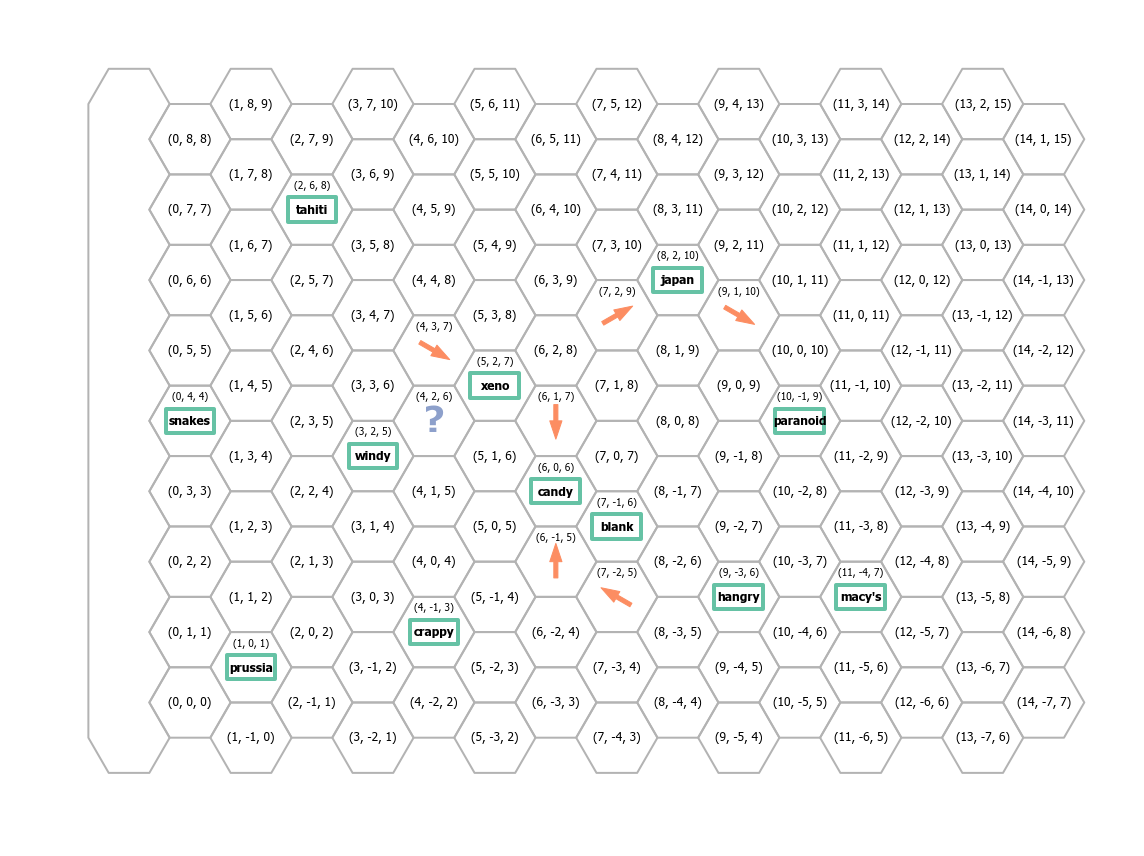

In [8]:
smap.seafall_plot_islands()
smap.seafall_plot_save("test2")

In [4]:
G = nx.Graph()

In [5]:

G.add_node((0,0,0))

In [6]:
G.add_node((0,1,1))

In [7]:
G.add_node((1,0,1))

In [8]:
G.add_node((1,-1,0))

In [10]:
G.add_edge((0,0,0),(0,1,1))
G.add_edge((0,0,0),(1,0,1))
G.add_edge((0,0,0),(1,-1,0))
G.add_edge((1,0,1),(1,-1,0))
G.add_edge((1,0,1),(0,1,1))

In [12]:
G.number_of_nodes()

4

In [14]:
G.number_of_edges()

5

In [16]:
df = nx.to_pandas_adjacency(G)
df.to_csv("test_adjacency.csv")

In [17]:
df = nx.to_pandas_edgelist(G)
df.to_csv("test_edgelist.csv")

In [21]:
df2 = pd.read_excel("map_adjacency_init.xlsx")

In [24]:
df2 = df2.fillna(0)

In [28]:
G2 = nx.from_pandas_adjacency(df2)

In [30]:
G2.number_of_nodes()

142

In [31]:
G2.number_of_edges()

380

In [41]:
from ast import literal_eval as make_tuple
make_tuple(list(G2.nodes)[0])

(0, 0, 0)

In [42]:
G2.add_node("coastal_waters")
G2.add_node("blue_harbor")
G2.add_node("green_harbor")
G2.add_node("gray_harbor")
G2.add_node("red_harbor")
G2.add_node("purple_harbor")

In [43]:
df3 = nx.to_pandas_adjacency(G2)

In [44]:
df3.to_csv("test_map.csv")

In [2]:
df4 = pd.read_excel("map_adjacency_init.xlsx")

In [3]:
G3 = nx.from_pandas_adjacency(df4, create_using=nx.DiGraph())

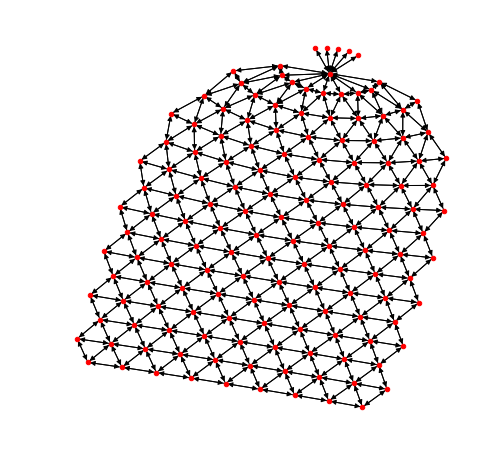

In [8]:
plt.subplots(figsize=(8, 8))
nx.draw(G3, pos=nx.kamada_kawai_layout(G3), node_size=20)
plt.show()

In [9]:
# Find the distance between two spaces on the board
nx.shortest_path_length(G3, source="blue_harbor", target="(3, 2, 5)")

5

In [10]:
# An opening salvo, perhaps? Just saying, "Hi"?
nx.shortest_path_length(G3, source="blue_harbor", target="gray_harbor")

2

In [11]:
# because of the coastal waters
nx.shortest_path_length(G3, source="(0, 0, 0)", target="(0, 8, 8)")

2

In [12]:
G_ego = nx.ego_graph(G3, "blue_harbor", radius=2)
list(G_ego.nodes)

['(0, 1, 1)',
 'blue_harbor',
 'coastal_waters',
 '(0, 8, 8)',
 'red_harbor',
 '(0, 2, 2)',
 '(0, 3, 3)',
 '(0, 7, 7)',
 'purple_harbor',
 '(0, 5, 5)',
 '(0, 0, 0)',
 'gray_harbor',
 '(0, 6, 6)',
 '(0, 4, 4)',
 'green_harbor']

In [13]:
# An combinatorial explosion. Two ships. Max Sail. +3 Sail from colony.
G_ego = nx.ego_graph(G3, "(3, 2, 5)", radius=8)
print("There are",len(G_ego.nodes)*len(G_ego.nodes),"possible placements of 2 ships on the board!")

There are 14161 possible placements of 2 ships on the board!


In [14]:
G3D = G3.to_directed() 
G3D.add_edge("(3, 4, 7)", "(5, 2, 7)")
pl_0 = nx.shortest_path_length(G3D, source="(3, 4, 7)", target="(5, 2, 7)")
pl_1 = nx.shortest_path_length(G3D, source="(5, 2, 7)", target="(3, 4, 7)")
print("With the current the distance is",pl_0)
print("Against the current the distance is",pl_1)

With the current the distance is 1
Against the current the distance is 2
